# Laurentia paleogeographic reconstructions generation

This Jupyter notebook develops paleogeographic reconstructions for Laurentia using the ```pygplates``` module (it therefore needs to be run with a Python 2.7 kernel). It is associated with the manuscript:

**The Precambrian paleogeography of Laurentia** written by Nicholas L. Swanson-Hysell for a book entitled *Ancient Supercontinents and the Paleogeography of the Earth*

The paleogeographic reconstructions use the model of Whitmeyer and Karlstrom. The following PLATE_ID values are used for the different elements. Some of these 4-digit numbers follow the model of Eglington and Evans. The Eglington and Evans model had many more tectonic blocks than that of Whitmeyer and Karlstrom such that these assignments correspond to one of the numerous blocks that make up a given block.

Slave Province | 

| Tectonic Block | Plate ID | Plate ID note |
|------|-----|-----|
| Churchill Province | 10496 | corresponds to Churchill (SE) in EE |
| Hearne Province | 10015 | corresponds to Hearne South in EE |
| Marshfield Terrane | 19000 | No equivelant block in EE |
| Medicine Hat Block | 10551 | corresponds to Medicine Hat in EE|
| Mojavia | 10029 | corresponds to Nain in EE (mainland Canada) |
| Nain | 10052 | corresponds to Mojave in EE |
| Rae Province | 10640 | corresponds to Rae (SW) in EE |
| Sask craton | 10039 | correspond to Sask in EE |
| Slave Province | 
| Superior (east) | 10043 | corresponds to Superior (Abitibi) in EE |
| Superior (west) | 10023 | corresponds to Superior (Minnesota River Valley) in EE |
| Wyoming Province | 10049 | corresponds to Wyoming in EE |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygplates

/Users/Laurentia/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
rotation_model = pygplates.FeatureCollection('Models/simple_Laurentia_model.rot')

anchor_plate = 0
Laurentia_pre_430 = 'Models/CEED6_poly_430_530_noGreenland_1000/CEED6_POLY.shp'

pygplates.reconstruct(Laurentia_pre_430, rotation_model, './reconstructions/Proterozoic_Laurentia_simple/0Ma_Laurentia_pre_430.shp', 0, anchor_plate)
for reconstruction_time in np.arange(530,1800,10):
    export_filename = './reconstructions/Proterozoic_Laurentia_simple/{0}Ma_Laurentia.shp'.format(reconstruction_time)
    pygplates.reconstruct(Laurentia_pre_430, rotation_model, export_filename, reconstruction_time, anchor_plate)

Using the CEED6 polygons over the Phanerozoic.

In [3]:
rotation_model = pygplates.FeatureCollection('models/TC2017_modified.rot')

anchor_plate = 1
Laurentia_0_300 = 'models/CEED6_poly_0_300_noGreenland/CEED6_POLY.shp'
Laurentia_300_420 = 'models/CEED6_poly_300_420_noGreenland/CEED6_POLY.shp'
Laurentia_420_430 = 'models/CEED6_poly_420_430_noGreenland/CEED6_POLY.shp'
Laurentia_430_530 = 'models/CEED6_poly_430_530_noGreenland/CEED6_POLY.shp'

pygplates.reconstruct(Laurentia_0_300, rotation_model, './reconstructions/TC2017_SH2017/0Ma_Laurentia_0_300.shp', 0, anchor_plate)
pygplates.reconstruct(Laurentia_300_420, rotation_model, './reconstructions/TC2017_SH2017/0Ma_Laurentia_300_420.shp', 0, anchor_plate)
pygplates.reconstruct(Laurentia_420_430, rotation_model, './reconstructions/TC2017_SH2017/0Ma_Laurentia_420_430.shp', 0, anchor_plate)
pygplates.reconstruct(Laurentia_430_530, rotation_model, './reconstructions/TC2017_SH2017/0Ma_Laurentia_430_530.shp', 0, anchor_plate)

for reconstruction_time in range(0,301):
    export_filename = './reconstructions/TC2017_SH2017/{0}Ma_Laurentia.shp'.format(reconstruction_time)
    pygplates.reconstruct(Laurentia_0_300, rotation_model, export_filename, reconstruction_time, anchor_plate)
    
for reconstruction_time in range(301,421):
    export_filename = './reconstructions/TC2017_SH2017/{0}Ma_Laurentia.shp'.format(reconstruction_time)
    pygplates.reconstruct(Laurentia_300_420, rotation_model, export_filename, reconstruction_time, anchor_plate)
    
for reconstruction_time in range(421,431):
    export_filename = './reconstructions/TC2017_SH2017/{0}Ma_Laurentia.shp'.format(reconstruction_time)
    pygplates.reconstruct(Laurentia_420_430, rotation_model, export_filename, reconstruction_time, anchor_plate)
    
for reconstruction_time in range(431,531):
    export_filename = './reconstructions/TC2017_SH2017/{0}Ma_Laurentia.shp'.format(reconstruction_time)
    pygplates.reconstruct(Laurentia_430_530, rotation_model, export_filename, reconstruction_time, anchor_plate)

OpenFileForReadingError: Error opening file '/Users/Laurentia/0000_Github/Laurentia_Paleogeography/models/TC2017_modified.rot' for reading

# Calculate centroid paths for Laurentia using different models

This noteboook contains code associated the manuscript chapter on Laurentia written by N. Swanson-Hysell for the book *“Ancient Supercontinents and the Paleogeography of the Earth.”* It calculates and exports motion paths implied for Laurentia by different paleogeographic models.



In [1]:
import numpy as np
import pygplates
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
duluth_lat = 46.8
duluth_lon = 267.9

## Define a function that calculates a motion path of a point

We want the motion path relative to the present. As a result, we need to set the digitisation_time and reconstruction_time to be 0. The function below calculates the motion path from the max_age until the present and then returns the motion path between the max_age and the provided min_age.

In [3]:
def motion_path_calc(point_lat,point_lon,min_age,max_age,rotation_file_path,moving_plate_id,relative_plate_id):
    
    rotation_model = pygplates.RotationModel(rotation_file_path)
    
    SeedPoint = (point_lat,point_lon)
    MovingPlate = moving_plate_id
    RelativePlate = relative_plate_id
    times = np.arange(0,max_age,2)
    times_output = np.arange(min_age,max_age,2)
    
    # Create a motion path feature
    digitisation_time = 0
    seed_points_at_digitisation_time = pygplates.MultiPointOnSphere([SeedPoint]) 
    motion_path_feature = pygplates.Feature.create_motion_path(
            seed_points_at_digitisation_time,
            times,
            valid_time=(max_age, 0),
            relative_plate=RelativePlate,
            reconstruction_plate_id = MovingPlate)
    
    # Create the shape of the motion path
    reconstruction_time = 0
    reconstructed_motion_paths = []
    pygplates.reconstruct(
            motion_path_feature, rotation_model, reconstructed_motion_paths, reconstruction_time,
            reconstruct_type=pygplates.ReconstructType.motion_path)

    # get the reconstructed coordinates into numpy arrays
    for reconstructed_motion_path in reconstructed_motion_paths:
        trail = reconstructed_motion_path.get_motion_path().to_lat_lon_array()
        
    return np.flipud(times_output), trail[0:len(times_output)]

## Torsvik and Cocks, 2017

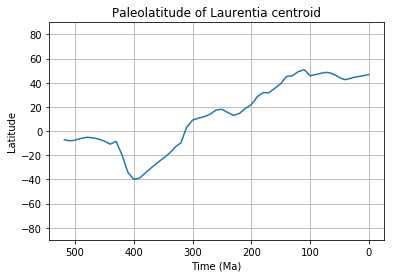

In [5]:
rotation_file_path = './models/TC2017.rot'
TC_2017_times, TC_2017_trail = motion_path_calc(duluth_lat,duluth_lon,0,520,rotation_file_path,101,1)

plt.plot(TC_2017_times,TC_2017_trail[:,0])
plt.title('Paleolatitude of Laurentia centroid')
plt.xlabel('Time (Ma)')
plt.ylabel('Latitude')
plt.ylim(-90,90)
plt.gca().grid()
plt.gca().invert_xaxis()
plt.show()

TC_2017_centroid_plat = pd.DataFrame(data=[TC_2017_times.tolist(),TC_2017_trail[:,0].tolist()]).transpose()
TC_2017_centroid_plat.to_csv('./models/motion_paths/Torsvik_2017_duluth_reconstruct.csv')

## Swanson-Hysell and Macdonald, 2017

This model is a modification of the Torsvik and Cocks (2017) model and utilizes data from allochthonous terranes as constraints in the Ordovician.

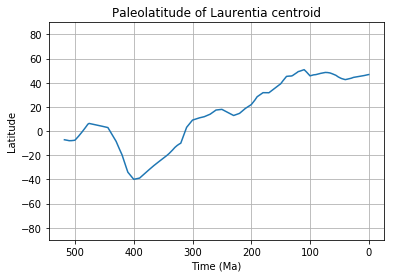

In [6]:
rotation_file_path = './models/TC2017_SHM2017_modified.rot'
SH_2017_times, SH_2017_trail = motion_path_calc(duluth_lat,duluth_lon,0,520,rotation_file_path,101,1)

plt.plot(SH_2017_times,SH_2017_trail[:,0])
plt.title('Paleolatitude of Laurentia centroid')
plt.xlabel('Time (Ma)')
plt.ylabel('Latitude')
plt.ylim(-90,90)
plt.gca().grid()
plt.gca().invert_xaxis()
plt.show()

SH_2017_centroid_plat = pd.DataFrame(data=[SH_2017_times.tolist(),SH_2017_trail[:,0].tolist()]).transpose()
SH_2017_centroid_plat.to_csv('./models/motion_paths/SH_2017_duluth_reconstruct.csv')

## Wright et al., 2013

This model is the default model being used in Macrostrat. It seeks to cover the entiriety of the Phanerozoic. It has many fewer tectonic elements than Torsvik and Cocks (2017).

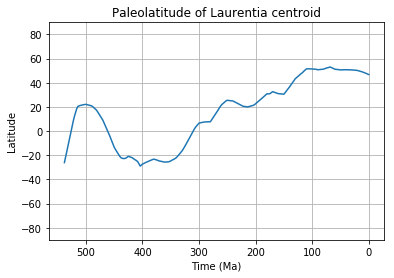

In [7]:
rotation_file_path = './models/Wright2013.rot'
W_2013_times, W_2013_trail = motion_path_calc(duluth_lat,duluth_lon,0,539,rotation_file_path,101,0)

plt.plot(W_2013_times,W_2013_trail[:,0])
plt.title('Paleolatitude of Laurentia centroid')
plt.xlabel('Time (Ma)')
plt.ylabel('Latitude')
plt.ylim(-90,90)
plt.gca().grid()
plt.gca().invert_xaxis()
plt.show()

W_2013_centroid_plat = pd.DataFrame(data=[W_2013_times.tolist(),W_2013_trail[:,0].tolist()]).transpose()
W_2013_centroid_plat.to_csv('./models/motion_paths/W_2013_duluth_reconstruct.csv')

## Merdith et al., 2017

The model starts in earnest at 1000 Ma. However, Laurentia's rotations in the .rot file go back to 1100 Ma and continue to 410 Ma.

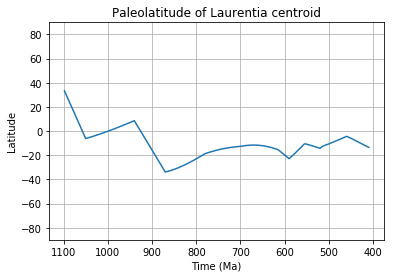

In [9]:
rotation_file_path = './models/Merdith2017.rot'

M_2017_times, M_2017_trail = motion_path_calc(duluth_lat,duluth_lon,410,1100,rotation_file_path,1001,0)

plt.plot(M_2017_times,M_2017_trail[:,0])
plt.title('Paleolatitude of Laurentia centroid')
plt.xlabel('Time (Ma)')
plt.ylabel('Latitude')
plt.ylim(-90,90)
plt.gca().grid()
plt.gca().invert_xaxis()
plt.show()

M_2017_centroid_plat = pd.DataFrame(data=[M_2017_times.tolist(),M_2017_trail[:,0].tolist()]).transpose()
M_2017_centroid_plat.to_csv('./models/motion_paths/M_2017_duluth_reconstruct.csv')

## Minimal Laurentia model

This model doesn't reconstruct Laurentia based on the poles from assumed correlations (such as Baltica) and relies on Laurentia poles along with interpolation.

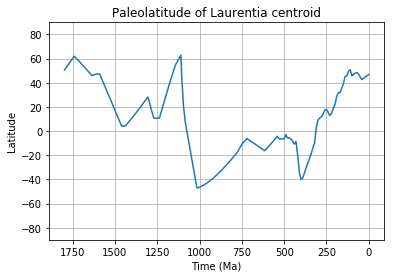

In [12]:
rotation_file_path = './models/simple_Laurentia_model.rot'

SH_prot_times, SH_prot_trail = motion_path_calc(duluth_lat,duluth_lon,0,1800,rotation_file_path,1000,1)

plt.plot(SH_prot_times,SH_prot_trail[:,0])
plt.title('Paleolatitude of Laurentia centroid')
plt.xlabel('Time (Ma)')
plt.ylabel('Latitude')
plt.ylim(-90,90)
plt.gca().grid()
plt.gca().invert_xaxis()
plt.show()

SH_prot_centroid_plat = pd.DataFrame(data=[SH_prot_times.tolist(),SH_prot_trail[:,0].tolist()]).transpose()
SH_prot_centroid_plat.to_csv('./models/motion_paths/SH_prot_duluth_simple_reconstruct.csv')